# Generating music via Neural Net
## Piano, single track
### Based on Google 2018 Music Transformer NN

Codes recycled from:

1) Alex https://github.com/asigalov61/SuperPiano/blob/master/Super_Piano_3.ipynb

2) Damon https://github.com/gwinndr/MusicTransformer-Pytorch

3) Jason https://github.com/jason9693/midi-neural-processor

4) Mir https://github.com/mirsiadaty

Thank you :)


## 1.1: initial imports

In [2]:
import time

print(time.asctime( time.localtime( time.time() ) ))

Mon Aug 29 16:13:51 2022


## 1.2: create dir for this project

In [17]:
# params
YourHomeDir = '/home/mnt3p22/'
YourProjectSubDir = 'sp3_1'

#
!mkdir $YourHomeDir/$YourDir
%cd $YourHomeDir/$YourDir
!ls -ltA 

print(time.asctime( time.localtime( time.time() ) ))

mkdir: cannot create directory ‘/home/mnt3p22//sp3_1’: File exists
/home/mnt3p22/sp3_1
total 8
drwxrwxr-x 7 mnt3p22 mnt3p22 4096 Aug 29 16:32 MusicTransformer-Pytorch
drwxrwxr-x 4 mnt3p22 mnt3p22 4096 Aug 29 16:29 midi-neural-processor
Mon Aug 29 17:46:28 2022


## 1.3: Check GPU and driver available

In [18]:
!nvcc --version
!nvidia-smi
print(time.asctime( time.localtime( time.time() ) ))

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
Mon Aug 29 17:47:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.141.03   Driver Version: 470.141.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 8000     Off  | 00000000:3B:00.0  On |                  Off |
| 33%   47C    P0    70W / 260W |   1446MiB / 48600MiB |      4%      Default |
|                               |                      |                  N/A |
+

## 2.1: clone github lib: Jason's MIDI

In [10]:
#!git clone https://github.com/asigalov61/midi-neural-processor
!git clone https://github.com/jason9693/midi-neural-processor

print(time.asctime( time.localtime( time.time() ) ))

Cloning into 'midi-neural-processor'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 27 (delta 0), reused 0 (delta 0), pack-reused 26
Unpacking objects: 100% (27/27), 8.56 KiB | 486.00 KiB/s, done.
Mon Aug 29 16:29:13 2022


## 2.2: clone github lib: Gwinn's NN

In [11]:
#!git clone https://github.com/asigalov61/MusicTransformer-Pytorch
!git clone https://github.com/gwinndr/MusicTransformer-Pytorch

print(time.asctime( time.localtime( time.time() ) ))

Cloning into 'MusicTransformer-Pytorch'...
remote: Enumerating objects: 346, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 346 (delta 5), reused 13 (delta 5), pack-reused 332
Receiving objects: 100% (346/346), 109.42 KiB | 3.65 MiB/s, done.
Resolving deltas: 100% (190/190), done.
Mon Aug 29 16:32:01 2022


## 2.3: QA

In [19]:
!pwd
!ls -ltA

print(time.asctime( time.localtime( time.time() ) ))

/home/mnt3p22/sp3_1
total 8
drwxrwxr-x 7 mnt3p22 mnt3p22 4096 Aug 29 16:32 MusicTransformer-Pytorch
drwxrwxr-x 4 mnt3p22 mnt3p22 4096 Aug 29 16:29 midi-neural-processor
Mon Aug 29 17:48:23 2022


## 3.1: Download pre-trained NN models  !!!!!!!!NONE!!!!!!!!!!!!

In [23]:
# (Optional) Pre-trained models download (2 models trained for 100 epochs to 1.968 FLoss and 0.420 acc)
!mkdir MusicTransformer-Pytorch/rpr
!mkdir MusicTransformer-Pytorch/rpr/results

%cd MusicTransformer-Pytorch/rpr/results
!wget 'https://superpiano.s3-us-west-1.amazonaws.com/SuperPiano3models.zip'
!unzip SuperPiano3models.zip
%cd MusicTransformer-Pytorch/

print(time.asctime( time.localtime( time.time() ) ))

mkdir: cannot create directory ‘MusicTransformer-Pytorch/rpr’: File exists
mkdir: cannot create directory ‘MusicTransformer-Pytorch/rpr/results’: File exists
/home/mnt3p22/sp3_1/MusicTransformer-Pytorch/rpr/results
--2022-08-30 09:31:59--  https://superpiano.s3-us-west-1.amazonaws.com/SuperPiano3models.zip
Resolving superpiano.s3-us-west-1.amazonaws.com (superpiano.s3-us-west-1.amazonaws.com)... 52.219.113.41
Connecting to superpiano.s3-us-west-1.amazonaws.com (superpiano.s3-us-west-1.amazonaws.com)|52.219.113.41|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-08-30 09:32:15 ERROR 404: Not Found.

unzip:  cannot find or open SuperPiano3models.zip, SuperPiano3models.zip.zip or SuperPiano3models.zip.ZIP.
[Errno 2] No such file or directory: 'MusicTransformer-Pytorch/'
/home/mnt3p22/sp3_1/MusicTransformer-Pytorch/rpr/results
Tue Aug 30 09:32:15 2022


## 4.1: Download, process music dataset

### 1.3: Setup Environment and Dependencies. Check GPU.

In [2]:
#@title Clone/Install all dependencies
!git clone https://github.com/asigalov61/midi-neural-processor
!git clone https://github.com/asigalov61/MusicTransformer-Pytorch
!pip install tqdm
!pip install progress
!pip install pretty-midi
!pip install pypianoroll
!pip install matplotlib
!pip install librosa
!pip install scipy
!pip install pillow
!apt install fluidsynth #Pip does not work for some reason. Only apt works
!pip install midi2audio
!pip install mir_eval
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 /content/font.sf2

Cloning into 'midi-neural-processor'...
remote: Enumerating objects: 26, done.
remote: Total 26 (delta 0), reused 0 (delta 0), pack-reused 26
Unpacking objects: 100% (26/26), 7.99 KiB | 681.00 KiB/s, done.
Cloning into 'MusicTransformer-Pytorch'...
remote: Enumerating objects: 385, done.
remote: Total 385 (delta 0), reused 0 (delta 0), pack-reused 385
Receiving objects: 100% (385/385), 103.20 KiB | 3.33 MiB/s, done.
Resolving deltas: 100% (206/206), done.
  Created wheel for progress: filename=progress-1.6-py3-none-any.whl size=9615 sha256=f31afadd86c2328cdea2375e4bdf1bd59f3ab6e5dfcc70b445d7c14ecd51afed
  Stored in directory: /home/mnt3p22/.cache/pip/wheels/bb/01/5a/c916509df9b12c6465864251dbe826def8e31a16fa7da54f08
Successfully built progress
     |████████████████████████████████| 5.6 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 51 kB 4.3 MB/s  eta 0:00:01
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591952 sha256=938e79e69b6d7

In [2]:
import time

#!pip install librosa

# verify
import librosa
print(librosa.__version__)

print(time.asctime( time.localtime( time.time() ) ))

0.9.2
Tue Jul 26 15:01:04 2022


In [3]:
#@title Import all needed modules
import numpy as np
import pickle
import os
import sys
import math
import random
# For plotting
import pypianoroll
from pypianoroll import Multitrack, Track
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('SVG')
#%matplotlib inline
#matplotlib.get_backend()
import mir_eval.display
import librosa
import librosa.display
# For rendering output audio
import pretty_midi
from midi2audio import FluidSynth
#from google.colab import output
from IPython.display import display, Javascript, HTML, Audio

print(time.asctime( time.localtime( time.time() ) ))

Tue Jul 26 15:01:05 2022


In [4]:
#@title (Optional) Pre-trained models download (2 models trained for 100 epochs to 1.968 FLoss and 0.420 acc)
# mss
#!mkdir /content/MusicTransformer-Pytorch/rpr
#!mkdir /content/MusicTransformer-Pytorch/rpr/results
#!mkdir -p /home/mnt3p22/MusicTransformer-Pytorch/rpr
!mkdir -p /home/mnt3p22/MusicTransformer-Pytorch/rpr/results

#%cd /content/MusicTransformer-Pytorch/rpr/results
%cd /home/mnt3p22/MusicTransformer-Pytorch/rpr/results


!wget 'https://superpiano.s3-us-west-1.amazonaws.com/SuperPiano3models.zip'
!unzip SuperPiano3models.zip

#%cd /content/MusicTransformer-Pytorch/
%cd /home/mnt3p22/MusicTransformer-Pytorch/

print(time.asctime( time.localtime( time.time() ) ))

/home/mnt3p22/MusicTransformer-Pytorch/rpr/results
--2022-07-26 15:02:43--  https://superpiano.s3-us-west-1.amazonaws.com/SuperPiano3models.zip
Resolving superpiano.s3-us-west-1.amazonaws.com (superpiano.s3-us-west-1.amazonaws.com)... 52.219.192.82
Connecting to superpiano.s3-us-west-1.amazonaws.com (superpiano.s3-us-west-1.amazonaws.com)|52.219.192.82|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-07-26 15:03:04 ERROR 404: Not Found.

unzip:  cannot find or open SuperPiano3models.zip, SuperPiano3models.zip.zip or SuperPiano3models.zip.ZIP.
/home/mnt3p22/MusicTransformer-Pytorch
Tue Jul 26 15:03:04 2022


#Please note that you MUST DOWNLOAD AND PROCESS ONE OF THE DATASETS TO TRAIN OR TO USE PRE-TRAINED MODEL as it primes the model from DATASET files.

#Option 1: MAESTRO DataSet

In [13]:
#@title Download Google Magenta MAESTRO v.2.0.0 Piano MIDI Dataset (~1300 MIDIs)

#%cd /content/MusicTransformer-Pytorch/dataset/
%cd /home/mnt3p22/MusicTransformer-Pytorch/dataset/

!wget 'https://storage.googleapis.com/magentadata/datasets/maestro/v2.0.0/maestro-v2.0.0-midi.zip'
!unzip maestro-v2.0.0-midi.zip

#%cd /content/MusicTransformer-Pytorch/
%cd /home/mnt3p22/MusicTransformer-Pytorch/

print(time.asctime( time.localtime( time.time() ) ))

/home/mnt3p22/MusicTransformer-Pytorch/dataset
--2022-07-26 15:13:04--  https://storage.googleapis.com/magentadata/datasets/maestro/v2.0.0/maestro-v2.0.0-midi.zip
Resolving storage.googleapis.com (storage.googleapis.com)... ^C
Archive:  maestro-v2.0.0-midi.zip
replace maestro-v2.0.0/maestro-v2.0.0.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
/home/mnt3p22/MusicTransformer-Pytorch
Tue Jul 26 15:13:08 2022


In [14]:
#@title Prepare directory sctructure and MIDI processor
#%cd /content/
%cd /home/mnt3p22/

!mv midi-neural-processor midi_processor
#%cd /content/MusicTransformer-Pytorch/
%cd /home/mnt3p22/MusicTransformer-Pytorch/


print(time.asctime( time.localtime( time.time() ) ))

/home/mnt3p22
mv: cannot stat 'midi-neural-processor': No such file or directory
/home/mnt3p22/MusicTransformer-Pytorch
Tue Jul 26 15:13:17 2022


In [15]:
#@title Process MAESTRO MIDI DataSet
!python3 preprocess_midi.py '/home/mnt3p22/MusicTransformer-Pytorch/dataset/maestro-v2.0.0'

print(time.asctime( time.localtime( time.time() ) ))

Preprocessing midi files and saving to ./dataset/e_piano
Found 1282 pieces
Preprocessing...
50 / 1282
100 / 1282
150 / 1282
200 / 1282
250 / 1282
300 / 1282
350 / 1282
400 / 1282
450 / 1282
500 / 1282
550 / 1282
600 / 1282
650 / 1282
700 / 1282
750 / 1282
800 / 1282
850 / 1282
900 / 1282
950 / 1282
1000 / 1282
1050 / 1282
1100 / 1282
1150 / 1282
1200 / 1282
1250 / 1282
Num Train: 967
Num Val: 137
Num Test: 178
Done!



#Option 2: Your own Custom MIDI DataSet

In [ ]:
#@title Create directory structure for the DataSet and prep MIDI processor



#!mkdir '/content/MusicTransformer-Pytorch/dataset/e_piano/'
#!mkdir '/content/MusicTransformer-Pytorch/dataset/e_piano/train'
#!mkdir '/content/MusicTransformer-Pytorch/dataset/e_piano/test'
#!mkdir '/content/MusicTransformer-Pytorch/dataset/e_piano/val'
#!mkdir '/content/MusicTransformer-Pytorch/dataset/e_piano/custom_midis'

!mkdir '/home/mnt3p22/MusicTransformer-Pytorch/dataset/e_piano/'
!mkdir '/home/mnt3p22//MusicTransformer-Pytorch/dataset/e_piano/train'
!mkdir '/home/mnt3p22/MusicTransformer-Pytorch/dataset/e_piano/test'
!mkdir '/home/mnt3p22/MusicTransformer-Pytorch/dataset/e_piano/val'
!mkdir '/home/mnt3p22/MusicTransformer-Pytorch/dataset/e_piano/custom_midis'

#%cd /content/
%cd /home/mnt3p22/
!mv midi-neural-processor midi_processor
#%cd /content/MusicTransformer-Pytorch/
%cd /home/mnt3p22/MusicTransformer-Pytorch/

print(time.asctime( time.localtime( time.time() ) ))

In [ ]:
#@title Upload your custom MIDI DataSet to created "dataset/e_piano/custom_midis" folder through this cell or manually through any other means. You can also use ready-to-use DataSets below
from google.colab import files
%cd '/content/MusicTransformer-Pytorch/dataset/e_piano/custom_midis'
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
#@title (The Best Choice/Works best stand-alone) Super Piano 2 Original 2500 MIDIs of Piano Music
%cd /content/MusicTransformer-Pytorch/dataset/e_piano/custom_midis
!wget 'https://github.com/asigalov61/SuperPiano/raw/master/Super_Piano_2_MIDI_DataSet_CC_BY_NC_SA.zip'
!unzip -j 'Super_Piano_2_MIDI_DataSet_CC_BY_NC_SA.zip'
!rm Super_Piano_2_MIDI_DataSet_CC_BY_NC_SA.zip

In [ ]:
#@title (Second Best Choice/Works best stand-alone) Alex Piano Only Original 450 MIDIs 
%cd /content/MusicTransformer-Pytorch/dataset/e_piano/custom_midis
!wget 'https://github.com/asigalov61/AlexMIDIDataSet/raw/master/AlexMIDIDataSet-CC-BY-NC-SA-Piano-Only.zip'
!unzip -j 'AlexMIDIDataSet-CC-BY-NC-SA-Piano-Only.zip'
!rm AlexMIDIDataSet-CC-BY-NC-SA-All-Drafts-Piano-Only.zip

For now, we are going to split the dataset by random into "test"/"val" dirs which is not ideal. So feel free to modify the code to your liking to achieve better training results with this implementation.

In [ ]:
#@title Process your custom MIDI DataSet :)
%cd /content/MusicTransformer-Pytorch
from processor import encode_midi

import os
import random



%cd '/content/MusicTransformer-Pytorch/dataset/e_piano/custom_midis'

custom_MIDI_DataSet_dir = '/content/MusicTransformer-Pytorch/dataset/e_piano/custom_midis'

train_dir = '/content/MusicTransformer-Pytorch/dataset/e_piano/train' # split_type = 0
test_dir = '/content/MusicTransformer-Pytorch/dataset/e_piano/test' # split_type = 1  
val_dir = '/content/MusicTransformer-Pytorch/dataset/e_piano/val' # split_type = 2

total_count = 0
train_count = 0
val_count   = 0
test_count  = 0

f_ext = '.pickle'
fileList = os.listdir(custom_MIDI_DataSet_dir)
for file in fileList:
     # we gonna split by a random selection for now
    
    split = random.randint(1, 2)
    if (split == 0):
         o_file = os.path.join(train_dir, file+f_ext)
         train_count += 1

    elif (split == 2):
         o_file0 = os.path.join(train_dir, file+f_ext)
         train_count += 1
         o_file = os.path.join(val_dir, file+f_ext)
         val_count += 1

    elif (split == 1):
         o_file0 = os.path.join(train_dir, file+f_ext)
         train_count += 1
         o_file = os.path.join(test_dir, file+f_ext)
         test_count += 1
    try:
      prepped = encode_midi(file)
      o_stream = open(o_file0, "wb")
      pickle.dump(prepped, o_stream)
      o_stream.close()

      prepped = encode_midi(file)
      o_stream = open(o_file, "wb")
      pickle.dump(prepped, o_stream)
      o_stream.close()
   
      print(file)
      print(o_file)
      print('Coverted!')  
    except KeyboardInterrupt: 
      raise   
    except:
      print('Bad file. Skipping...')

print('Done')
print("Num Train:", train_count)
print("Num Val:", val_count)
print("Num Test:", test_count)
print("Total Count:", train_count)

%cd /content/MusicTransformer-Pytorch

#Train the Model

In [17]:
#@title Activate Tensorboard Graphs/Stats to monitor/evaluate model perfomance during and after training runs
# Load the TensorBoard notebook extension
%reload_ext tensorboard
import tensorflow as tf
import datetime, os

#%tensorboard --logdir /content/MusicTransformer-Pytorch/rpr
%tensorboard --logdir /home/mnt3p22/MusicTransformer-Pytorch/rpr

print(time.asctime( time.localtime( time.time() ) ))

Reusing TensorBoard on port 6006 (pid 4619), started 0:00:17 ago. (Use '!kill 4619' to kill it.)

Tue Jul 26 15:23:00 2022


In [ ]:
#@title Start to Train the Model
batch_size = 4 #@param {type:"slider", min:0, max:8, step:1}

#number_of_training_epochs = 150 #@param {type:"slider", min:0, max:200, step:1}
number_of_training_epochs = 50 #@param {type:"slider", min:0, max:200, step:1}

maximum_output_MIDI_sequence = 2048 #@param {type:"slider", min:0, max:8192, step:128}

print(time.asctime( time.localtime( time.time() ) ))
strt = time.asctime( time.localtime( time.time() ) )

!python3 train.py -output_dir rpr --rpr -batch_size=$batch_size -epochs=$number_of_training_epochs -max_sequence=$maximum_output_MIDI_sequence #-n_layers -num_heads -d_model -dim_feedforward

print(strt)
print(time.asctime( time.localtime( time.time() ) ))

Tue Jul 26 15:44:17 2022
input_dir: ./dataset/e_piano
output_dir: rpr
weight_modulus: 1
print_modulus: 1

n_workers: 1
force_cpu: False
tensorboard: True

continue_weights: None
continue_epoch: None

lr: None
ce_smoothing: None
batch_size: 4
epochs: 50

rpr: True
max_sequence: 2048
n_layers: 6
num_heads: 8
d_model: 512

dim_feedforward: 1024
dropout: 0.1

2022-07-26 15:44:18.596454: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-26 15:44:18.596487: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Baseline model evaluation (Epoch 0):
Epoch: 0
Avg train loss: 6.219924540559123
Avg train acc: 0.002007490427094735
Avg eval loss: 6.220743380652534
Avg eval acc: 0.0018272959808301595


NEW EPOCH: 1

Epoch 1  Batch 1 / 242
LR: 1.7469281074217108e-07
Tra

In [ ]:
#@title Re-Start Training from a certain checkpoint and epoch
batch_size = 4 #@param {type:"slider", min:0, max:8, step:1}
number_of_training_epochs = 150 #@param {type:"slider", min:0, max:200, step:1}
maximum_output_MIDI_sequence = 2048 #@param {type:"slider", min:0, max:8192, step:128}

saved_checkpoint_full_path = "/home/mnt3p22/MusicTransformer-Pytorch/rpr/weights/epoch_0033.pickle" #@param {type:"string"}
#saved_checkpoint_full_path = "/content/MusicTransformer-Pytorch/rpr/weights/epoch_0033.pickle" #@param {type:"string"}

continue_epoch_number = 33 #@param {type:"integer"}

!python3 train.py -output_dir rpr --rpr -batch_size=$batch_size -epochs=$number_of_training_epochs -max_sequence=$maximum_output_MIDI_sequence -continue_weights $saved_checkpoint_full_path -continue_epoch $continue_epoch_number #-n_layers -num_heads -d_model -dim_feedforward

###Evaluate the resulted models

In [1]:
#@title Evaluate Best Resulting Accuracy Model (best_acc_weights.pickle)
!python3 evaluate.py -model_weights rpr/results/best_acc_weights.pickle --rpr

python3: can't open file 'evaluate.py': [Errno 2] No such file or directory


In [2]:
#@title Evaluate Best Resulting Loss Model (best_loss_weights.pickle)
!python3 evaluate.py -model_weights rpr/results/best_loss_weights.pickle --rpr

python3: can't open file 'evaluate.py': [Errno 2] No such file or directory


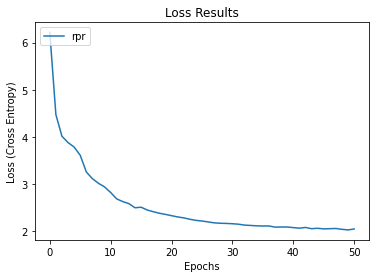

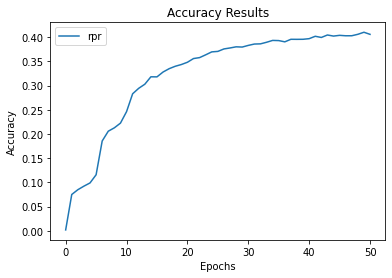

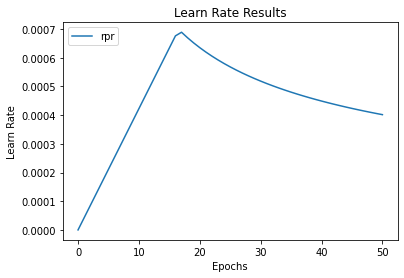

In [3]:
#@title Graph the results
import argparse
import os
import csv
import math
import matplotlib.pyplot as plt

RESULTS_FILE = "results.csv"
EPOCH_IDX = 0
LR_IDX = 1
EVAL_LOSS_IDX = 4
EVAL_ACC_IDX = 5

SPLITTER = '?'


#def graph_results(input_dirs="/content/MusicTransformer-Pytorch/rpr/results", output_dir=None, model_names=None, epoch_start=0, epoch_end=None):
def graph_results(input_dirs="/home/mnt3p22/MusicTransformer-Pytorch/rpr/results", output_dir=None, model_names=None, epoch_start=0, epoch_end=None):
    """
    ----------
    Author: Damon Gwinn
    ----------
    Graphs model training and evaluation data
    ----------
    """

    input_dirs = input_dirs.split(SPLITTER)

    if(model_names is not None):
        model_names = model_names.split(SPLITTER)
        if(len(model_names) != len(input_dirs)):
            print("Error: len(model_names) != len(input_dirs)")
            return

    #Initialize Loss and Accuracy arrays
    loss_arrs = []
    accuracy_arrs = []
    epoch_counts = []
    lrs = []

    for input_dir in input_dirs:
        loss_arr = []
        accuracy_arr = []
        epoch_count = []
        lr_arr = []

        f = os.path.join(input_dir, RESULTS_FILE)
        with open(f, "r") as i_stream:
            reader = csv.reader(i_stream)
            next(reader)

            lines = [line for line in reader]

        if(epoch_end is None):
            epoch_end = math.inf

        epoch_start = max(epoch_start, 0)
        epoch_start = min(epoch_start, epoch_end)

        for line in lines:
            epoch = line[EPOCH_IDX]
            lr = line[LR_IDX]
            accuracy = line[EVAL_ACC_IDX]
            loss = line[EVAL_LOSS_IDX]

            if(int(epoch) >= epoch_start and int(epoch) < epoch_end):
                accuracy_arr.append(float(accuracy))
                loss_arr.append(float(loss))
                epoch_count.append(int(epoch))
                lr_arr.append(float(lr))

        loss_arrs.append(loss_arr)
        accuracy_arrs.append(accuracy_arr)
        epoch_counts.append(epoch_count)
        lrs.append(lr_arr)

    if(output_dir is not None):
        try:
            os.mkdir(output_dir)
        except OSError:
            print ("Creation of the directory %s failed" % output_dir)
        else:
            print ("Successfully created the directory %s" % output_dir)

    ##### LOSS #####
    for i in range(len(loss_arrs)):
        if(model_names is None):
            name = None
        else:
            name = model_names[i]

        #Create and save plots to output folder
        plt.plot(epoch_counts[i], loss_arrs[i], label=name)
        plt.title("Loss Results")
        plt.ylabel('Loss (Cross Entropy)')
        plt.xlabel('Epochs')
        fig1 = plt.gcf()

    plt.legend(loc="upper left")

    if(output_dir is not None):
        fig1.savefig(os.path.join(output_dir, 'loss_graph.png'))

    plt.show()

    ##### ACCURACY #####
    for i in range(len(accuracy_arrs)):
        if(model_names is None):
            name = None
        else:
            name = model_names[i]

        #Create and save plots to output folder
        plt.plot(epoch_counts[i], accuracy_arrs[i], label=name)
        plt.title("Accuracy Results")
        plt.ylabel('Accuracy')
        plt.xlabel('Epochs')
        fig2 = plt.gcf()

    plt.legend(loc="upper left")

    if(output_dir is not None):
        fig2.savefig(os.path.join(output_dir, 'accuracy_graph.png'))

    plt.show()

    ##### LR #####
    for i in range(len(lrs)):
        if(model_names is None):
            name = None
        else:
            name = model_names[i]

        #Create and save plots to output folder
        plt.plot(epoch_counts[i], lrs[i], label=name)
        plt.title("Learn Rate Results")
        plt.ylabel('Learn Rate')
        plt.xlabel('Epochs')
        fig2 = plt.gcf()

    plt.legend(loc="upper left")

    if(output_dir is not None):
        fig2.savefig(os.path.join(output_dir, 'lr_graph.png'))

    plt.show()
    
#graph_results('/content/MusicTransformer-Pytorch/rpr/results', model_names='rpr')    
graph_results('/home/mnt3p22/MusicTransformer-Pytorch/rpr/results', model_names='rpr')

To have the model continue your custom MIDI enter the following into the custom_MIDI field below:

-primer_file '/content/some_dir/some_seed_midi.mid'

For example: -primer_file '/content/MusicTransformer-Pytorch/seed.mid'

# Generate and Explore the output :)

In [ ]:
#@title Generate, Plot, Graph, Save, Download, and Render the resulting output
number_of_tokens_to_generate = 1023 #@param {type:"slider", min:1, max:2048, step:1}
priming_sequence_length = 65 #@param {type:"slider", min:1, max:2048, step:8}
maximum_possible_output_sequence = 2048 #@param {type:"slider", min:0, max:2048, step:8}

#select_model = "/content/MusicTransformer-Pytorch/rpr/results/best_loss_weights.pickle" #@param ["/content/MusicTransformer-Pytorch/rpr/results/best_acc_weights.pickle", "/content/MusicTransformer-Pytorch/rpr/results/best_loss_weights.pickle"]
select_model = "/home/mnt3p22/MusicTransformer-Pytorch/rpr/results/best_loss_weights.pickle" #@param ["/content/MusicTransformer-Pytorch/rpr/results/best_acc_weights.pickle", "/content/MusicTransformer-Pytorch/rpr/results/best_loss_weights.pickle"]

custom_MIDI = "" #@param {type:"string"}

import processor
from processor import encode_midi, decode_midi

!python generate.py -output_dir output -model_weights=$select_model --rpr -target_seq_length=$number_of_tokens_to_generate -num_prime=$priming_sequence_length -max_sequence=$maximum_possible_output_sequence $custom_MIDI #

print('Successfully exported the output to output folder. To primer.mid and rand.mid')

# set the src and play
#FluidSynth("/content/font.sf2").midi_to_audio('/content/MusicTransformer-Pytorch/output/rand.mid', '/content/MusicTransformer-Pytorch/output/output.wav')
FluidSynth("/home/mnt3p22/font.sf2").midi_to_audio('/home/mnt3p22/MusicTransformer-Pytorch/output/rand.mid', '/content/MusicTransformer-Pytorch/output/output.wav')

from google.colab import files

files.download('/home/mnt3p22/MusicTransformer-Pytorch/output/rand.mid')
files.download('/home/mnt3p22/MusicTransformer-Pytorch/output/primer.mid')
#files.download('/content/MusicTransformer-Pytorch/output/rand.mid')
#files.download('/content/MusicTransformer-Pytorch/output/primer.mid')



#Audio('/content/MusicTransformer-Pytorch/output/output.wav')
Audio('/home/mnt3p22/MusicTransformer-Pytorch/output/output.wav')


In [ ]:
#@title Plot and Graph the Output :)
graphs_length_inches = 18 #@param {type:"slider", min:0, max:20, step:1}
notes_graph_height = 6 #@param {type:"slider", min:0, max:20, step:1}
highest_displayed_pitch = 92 #@param {type:"slider", min:1, max:128, step:1}
lowest_displayed_pitch = 24 #@param {type:"slider", min:1, max:128, step:1}
piano_roll_color_map = "Blues"

import librosa
import numpy as np
import pretty_midi
import pypianoroll
from pypianoroll import Multitrack, Track
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('SVG')
# For plotting
import mir_eval.display
import librosa.display
%matplotlib inline


#midi_data = pretty_midi.PrettyMIDI('/content/MusicTransformer-Pytorch/output/rand.mid')
midi_data = pretty_midi.PrettyMIDI('/home/mnt3p22/MusicTransformer-Pytorch/output/rand.mid')

def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))



roll = np.zeros([int(graphs_length_inches), 128])
# Plot the output

track = Multitrack('/home/mnt3p22/MusicTransformer-Pytorch/output/rand.mid', name='track')
#track = Multitrack('/content/MusicTransformer-Pytorch/output/rand.mid', name='track')

plt.figure(figsize=[graphs_length_inches, notes_graph_height])
fig, ax = track.plot()
fig.set_size_inches(graphs_length_inches, notes_graph_height)
plt.figure(figsize=[graphs_length_inches, notes_graph_height])
ax2 = plot_piano_roll(midi_data, int(lowest_displayed_pitch), int(highest_displayed_pitch))
plt.show(block=False)

### Save to Google Drive (Standard GD connect code)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')